In [58]:
# Librerías 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [56]:
class KNearestNeighbors:
    def __init__(self, k=3):
        self.k = k # Inicializa el numero de k-neighboors 
        self.punto = None  #Punto central usado para predicción de las categorias 
        self.puntos = None
        self.categorias = None
    
    # Función para calcular la distacia entre dos puntos -> Funciona n-dim
    def distancia_euclideana(self, p, q):
        return np.sqrt(np.sum((np.array(p) - np.array(q))**2)) #Operación de elemento a elemento
    
    # Points
    def fit(self, puntos, categorias):
        self.puntos = puntos #Points es el conjunto de datos de entrenamiento. 
        self.categorias = categorias
        
    # Predicción -> Donde ocurre la magia 
    def predict(self, nuevo_punto):
        distancias = [] #Distancias entre la instancia y los k-neighboors 
        # Se selecciona un ejemplo de los ejemplos -> 
        
        for i, punto in enumerate(self.puntos):
            distancia = self.distancia_euclideana(punto, nuevo_punto)
            distancias.append([distancia, self.categorias[i]])
        
        distancias.sort()
        # Ordena las distancias de menor a mayor -> Selecciona los 3 primeros elementos de la lista de distancias -> 
        # Creamos una lista y guardamos la categoría asociada a los k-nearest-neigh
        categorias = [categoria[1] for categoria in sorted(distancias)[:self.k]]
        
        # most_common(1) -> Contiene la clase más común -> Accede al primer elemento y el primer elemento (la categoría)
        resultado = Counter(categorias).most_common(1)[0][0]
        return resultado

In [156]:
df = pd.read_csv("https://raw.githubusercontent.com/edgarsmdn/MLCE_book/main/references/mutagenicity_kNN.csv")

In [157]:
df['Predicted value'].dtype

dtype('O')

In [68]:
df['Predicted value'].value_counts() 

Predicted value
1                3309
0                2449
Non Predicted       6
Name: count, dtype: int64

#### Se deben eliminar los Non Predict y los elementos duplicados

In [69]:
df['Predicted value'].drop_duplicates()

0                   1
3                   0
1844    Non Predicted
Name: Predicted value, dtype: object

In [70]:
non_predicted = df[ (df['Predicted value'] != "0") & (df['Predicted value'] != "1") ].index
df_clean = df.drop(non_predicted)

In [71]:
df_clean.head()

,Unnamed: 0,Id,CAS,SMILES,Status,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,0,1,100-00-5,O=[N+]([O-])c1ccc(cc1)Cl,Training,1,1,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.2482
1,1,2,100-01-6,O=[N+]([O-])c1ccc(N)cc1,Training,1,1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.1770
2,2,3,100-02-7,O=[N+]([O-])c1ccc(O)cc1,Training,0,1,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.3004
3,3,4,100-11-8,O=[N+]([O-])c1ccc(cc1)CBr,Training,1,0,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.4897
4,4,5,100-12-9,O=[N+]([O-])c1ccc(cc1)CC,Training,0,0,58,0.479785,43.14,42.4744,2.913802,253.299498,151.165,2.1572


In [73]:
df_clean["Predicted value"].value_counts()

Predicted value
1    3309
0    2449
Name: count, dtype: int64

## Conjuntos de features y labels

In [77]:
X = df_clean.drop(['Unnamed: 0', 'Id','CAS','SMILES','Status','Experimental value','Predicted value'],axis=1)
y = df_clean['Experimental value'].values

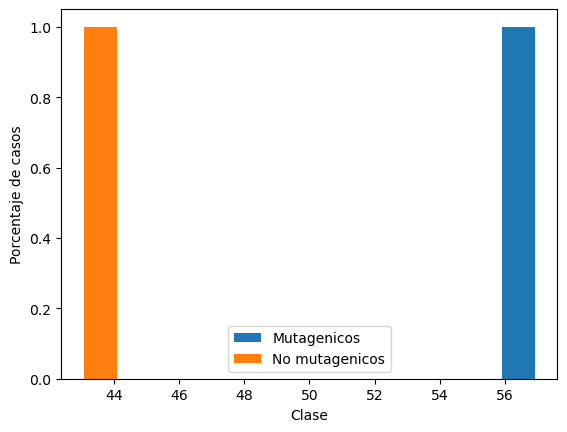

In [98]:
# Proporcion de los datos presentes en cada clase -> 
porcentaje_mutagenico = y.sum()/len(y)*100
no_mutagenico = 100 - porcentaje_mutagenico 

df = pd.DataFrame({"Mutagenicos": porcentaje_mutagenico, 
                   "No mutagenicos": no_mutagenico},
                index = [1])
plt.hist(df["Mutagenicos"], bins=1, label="Mutagenicos");
plt.hist(df["No mutagenicos"], bins=1,label="No mutagenicos");
plt.xlabel('Clase')
plt.ylabel('Porcentaje de casos')
plt.legend(); 

In [99]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Escalamiento de los atributos 

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [116]:
# Modelo KNN -> 
clf = KNearestNeighbors()
clf.fit(X_train, y_train)

In [130]:
X_test[0]

array([-0.39501052,  0.51664862,  0.48643009, -0.56257236,  0.39240648,
       -0.24015662, -0.43757241, -0.80788412])

In [139]:
y_test[7]

1

In [140]:
clf.predict(X_test[7])

1

In [142]:
y_preds = []
for i in X_test: 
    y_preds.append(clf.predict(i))

In [154]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Accuracy
ac = accuracy_score(y_test, y_preds)
print(f"El accuracy es de {round(ac*100,2)}%")

El accuracy es de 69.79%


In [155]:
# Confusion matrix 
cm = confusion_matrix(y_test, y_preds)
cm

array([[317, 188],
       [160, 487]], dtype=int64)

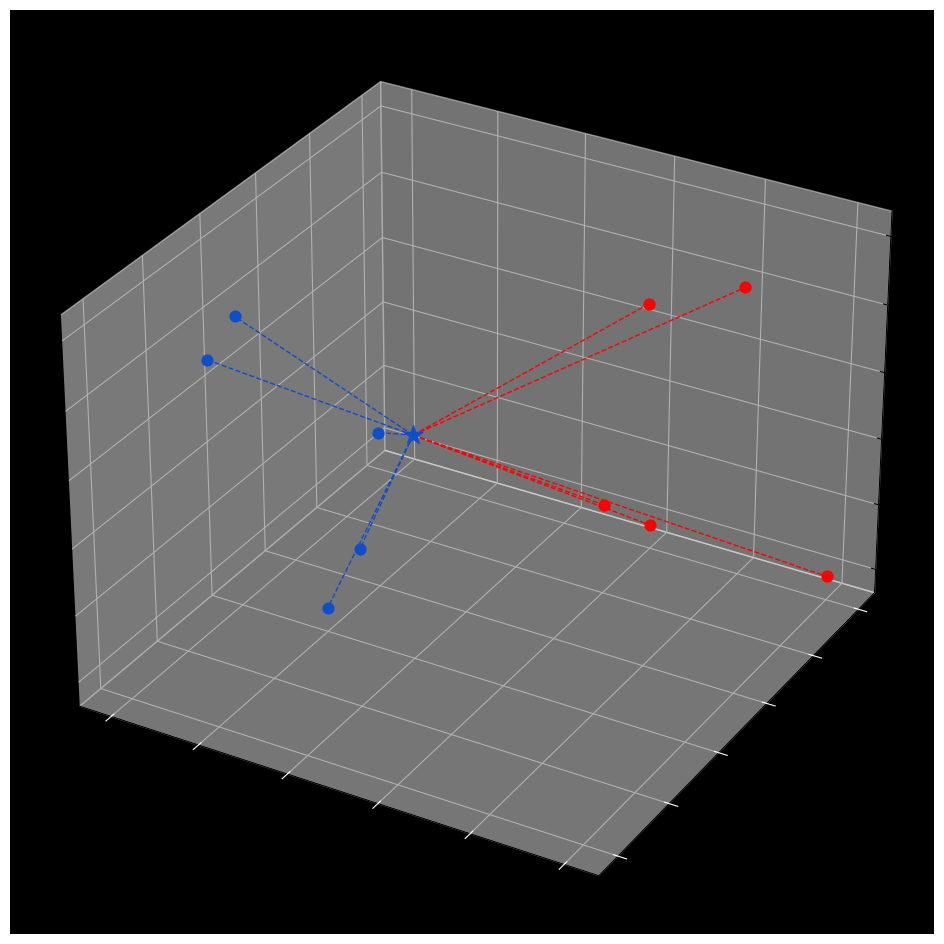

In [43]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(projection="3d")
ax.grid(True, color="#323232")
ax.set_facecolor("black")
ax.tick_params(axis="x", color="white")
ax.tick_params(axis="y", color="white")

for point in points["blue"]:
    ax.scatter(point[0], point[1], point[2], color="#104DCA", s=60)
    
for point in points["red"]:
    ax.scatter(point[0], point[1], point[2], color="#FF0000", s=60)
    
new_class = clf.predict(new_point)
color = "#FF0000" if new_class == "red" else "#104DCA"

ax.scatter(new_point[0], new_point[1], new_point[2], color=color, marker="*", s=200, zorder=100)

for point in points["blue"]:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], [new_point[2], point[2]], color="#104DCA", linestyle="--", linewidth=1)
    
for point in points["red"]:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], [new_point[2], point[2]], color="#FF0000", linestyle="--", linewidth=1)
